<a href="https://colab.research.google.com/github/aimanrashid/Photovoltaic-Solar-Panel/blob/main/ReadTemperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Libraries

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install flyr
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install pvimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43.3 MB 1.3 MB/s 
     |████████████████████████████████| 318 kB 58.9 MB/s 
  Created wheel for pyhull: filename=pyhull-2015.2.1-cp37-cp37m-linux_x86_64.whl size=446436 sha256=381f2e3693f8cd190930b22020ea0367dbf332d3cc7649914d061b1733e9481a
  Stored in directory: /root/.cache/pip/wheels/dc/9e/c8/91b505eab15b1dd28cb140e4017951eced2c5fc3c3b96a80dc
Successfully built

# Temperature Reader

None


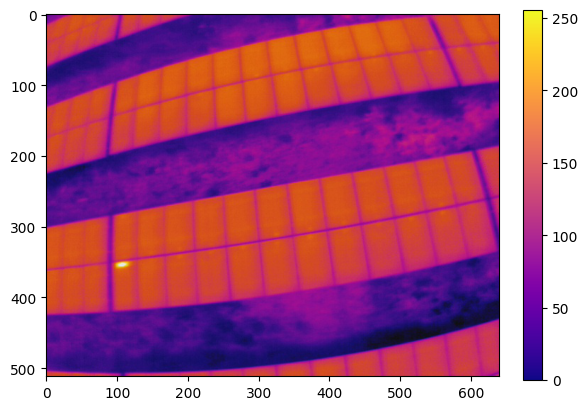

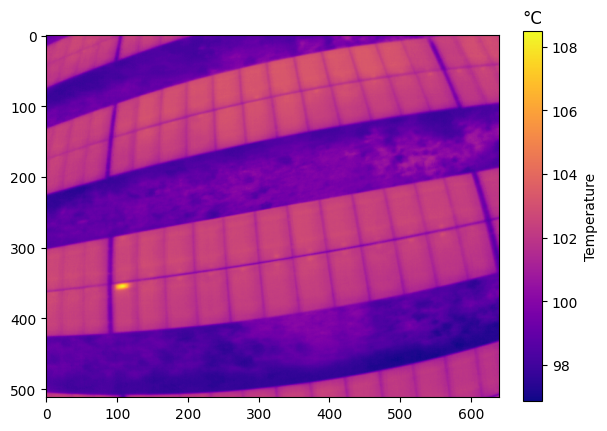

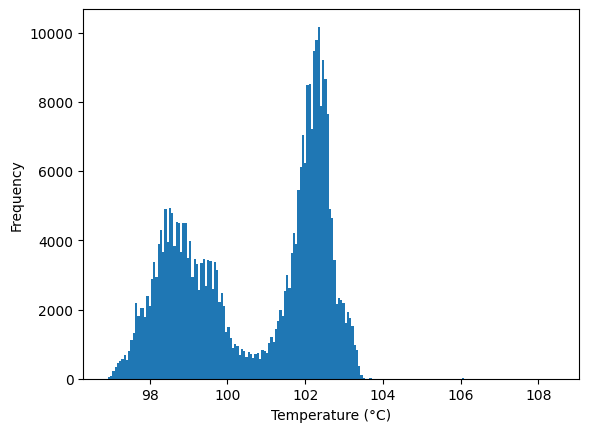

[96.86417425946706, 108.4733081973801]
[[581 436]
 [497 459]
 [108 355]]


In [ ]:
import flyr, numpy as np
from matplotlib import pyplot as plt, image as mpimg

flir_path = "20180630_154531.jpg"
thermogram = flyr.unpack(flir_path)

thermal = thermogram.celsius  # As celsius
# thermogram.palette = 'ocean'
print(thermogram.palette)


image = mpimg.imread(flir_path)
im_ratio = image.shape[0]/image.shape[1]
plt.imshow(image, cmap='plasma')
# plt.xticks([]), plt.yticks([])
plt.colorbar(fraction=0.047*im_ratio)
plt.show()

plt.imshow(thermal, cmap='plasma')
im_ratio = thermal.shape[0]/thermal.shape[1]
plt.colorbar(label="Temperature", fraction=0.047*im_ratio).ax.set_title("°C")
min_T, max_T = np.min(thermal), np.max(thermal)
min_pos = np.array([np.where(thermal == min_T)[1], np.where(thermal == min_T)[0]])
max_pos = np.array([np.where(thermal == max_T)[1], np.where(thermal == max_T)[0]])
pos = np.concatenate((min_pos.transpose(), max_pos.transpose()), axis=0)
# plt.scatter(max_pos[0], max_pos[1])
# plt.scatter(min_pos[0], min_pos[1])
# plt.scatter(pos[:, 0], pos[:, 1], s=50, c={'blue', 'red'}, marker='+')
# plt.xticks([]), plt.yticks([])

plt.show()

plt.hist(thermal.flatten(), bins=200)
plt.xlabel('Temperature (°C)'), plt.ylabel('Frequency')
plt.show()

print([min_T, max_T])
print(pos)

In [ ]:
mean_T, std_T = np.mean(thermal), np.std(thermal)
range_T = [mean_T - 3.5*std_T, mean_T + 3.5*std_T]
print("mean_T = %.2f;" % mean_T, "std_T = %.2f" % std_T)
print("range_T = ", np.round(range_T, 2))

mean_T = 100.66; std_T = 1.79
range_T =  [ 94.41 106.91]


## Probability Distribution Function

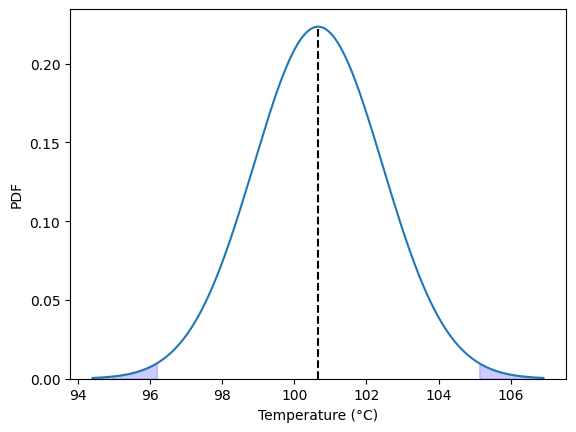

In [ ]:
# A custom function to calculate 
# probability distribution function 

def pdf(x):
    return 1/(std_T * np.sqrt(2 * np.pi)) * np.exp( - (x - mean_T)**2 / (2 * std_T**2)) 


  
# To generate an array of x-values 
x = np.arange(range_T[0], range_T[1], 0.01) 
  
# To generate an array of  
# y-values using corresponding x-values 

y = pdf(x) 

  
# To fill in values under the bell-curve 
x_fill_left = np.arange(range_T[0], mean_T - 2.5*std_T, 0.01) 
y_fill_left = pdf(x_fill_left) 

x_fill_right = np.arange(mean_T + 2.5*std_T, range_T[1], 0.01)
y_fill_right = pdf(x_fill_right)

  
# Plotting the bell-shaped curve 
# plt.style.use('default')
 
# plt.figure(figsize = (6, 6)) 
plt.plot(x, y)
# plt.ylim((0, np.max(pdf(x))))
plt.gca().set_ylim(bottom=0)
plt.xlabel('Temperature (°C)'), plt.ylabel('PDF')
  
# plt.scatter(x, y, marker = 'o', 
#            s = 25, color = 'red') 

plt.fill_between(x_fill_left, y_fill_left, 0, 
                 alpha = 0.2, color = 'blue') 

plt.fill_between(x_fill_right, y_fill_right, 0,
                 alpha = 0.2, color = 'blue')

ymin, ymax = np.interp([0, np.max(y)], [0, plt.ylim()[1]], [0, 1])
plt.axvline(mean_T, ymin=ymin, ymax=ymax, color='k', linestyle='--')
plt.show()

In [ ]:
pos_gr = np.array(np.where(thermal > range_T[1]))
print(pos_gr)

[[353 353 353 353 353 353 354 354 354 354 354 354 354 354 354 354 355 355
  355 355 355 355 355 355 355 355 355 356 356 356 356 356 356 356 356 356
  356 357 357 357 357 357 357 357]
 [106 107 108 109 110 111 103 104 105 106 107 108 109 110 111 112 102 103
  104 105 106 107 108 109 110 111 112 102 103 104 105 106 107 108 109 110
  111 103 104 105 106 107 108 109]]


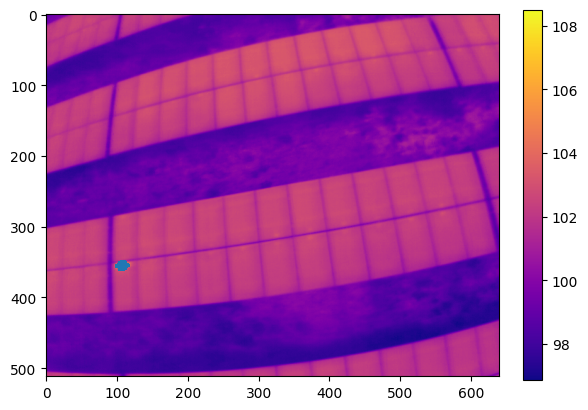

In [ ]:
plt.imshow(thermal, cmap='plasma')
plt.colorbar(fraction=0.047*im_ratio)
plt.scatter(pos_gr[1, :], pos_gr[0, :], marker='+')
plt.show()

## Detect Photovoltaic Solar Panels

In [ ]:
import cv2
import numpy as np

img = cv2.imread(flir_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 100, 200)    
th3 = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

im2, contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('Len of contours: ' % len(contours))
# try:
#    hierarchy = hierarchy[0]
# except: 
#    hierarchy = []

height, width,  = edges.shape
min_x, min_y = width, height
max_x = max_y = 0

# computes the bounding box for the contour, and draws it on the image,
for contour, hier in zip(contours, hierarchy):
    area = cv2.contourArea(contour)

    if area > 10000 and area < 250000:
        (x,y,w,h) = cv2.boundingRect(contour)
        min_x, max_x = min(x, min_x), max(x+w, max_x)
        min_y, max_y = min(y, min_y), max(y+h, max_y)
        if w > 80 and h > 80:
            cv2.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2)

            cv2.imshow('cont imge', img)
            cv2.waitKey(0)

ValueError: ignored

In [ ]:
import cv2
import numpy as np
img = cv2.imread("20180630_154531.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
ret, thresh1 = cv2.threshold(hsv[:, :, 0], 100, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

try: hierarchy = hierarchy[0]
except: hierarchy = []

for contour, hier in zip(contours, hierarchy):
    area = cv2.contourArea(contour)
    if area > 10000 and area < 250000:
       rect = cv2.minAreaRect(contour)
       box = cv2.boxPoints(rect)
       box = np.int0(box)
       cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
       cv2.imshow('cont imge', img)
       cv2.waitKey(0)
cv2.imwrite("result.jpg",img)

ValueError: ignored

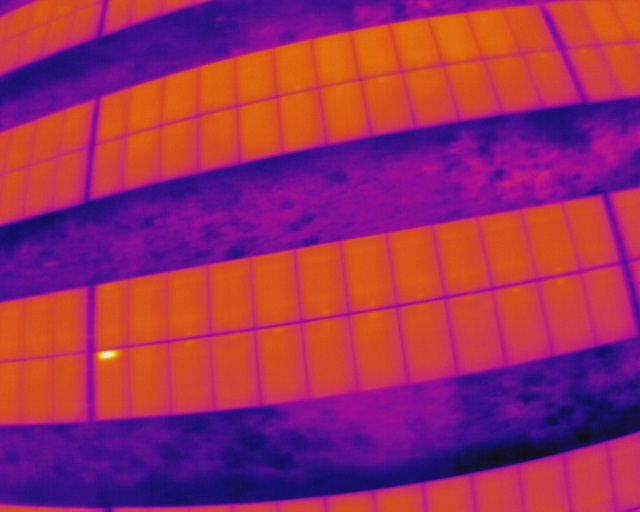

(512, 640, 3)


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import pvimage as pvi

img = cv2.imread("20180630_154531.jpg")
cv2_imshow(img)

print(img.shape)
cells = pvi.process.CellExtract(img, 14, 5, imgtype='gradient')

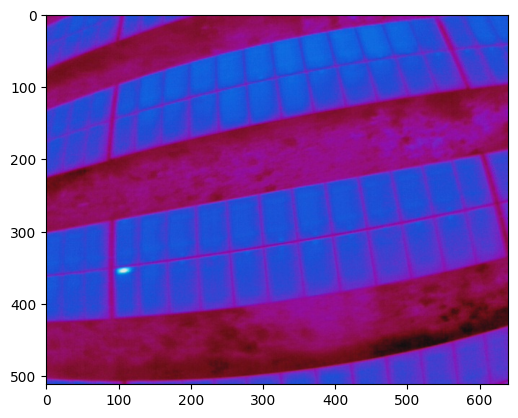

UnboundLocalError: ignored

In [ ]:
"""
@author: Jennifer Braid
"""
import pvimage as pvi
import glob2
from os import chdir
import os
import cv2
from matplotlib import pyplot as plt

# wd = os.path.dirname(os.path.abspath(__file__))
# print(wd)
# chdir(wd)
"""
print(os.getcwd())
ELfolder_path = '../content'
ELfiles = glob2.glob(ELfolder_path)
save_path = '../content'

#Extracting individual cells, saving each, and stitching into a combined image
for file in ELfiles:
    try:
        pvi.pipelines.MMpipeline(file,save_path,2,2,True)
    except OverflowError:
        pvi.pipelines.MMpipeline(file,save_path,2,2,True,'lowcon')
"""
PLfile = '20180630_154531.jpg'
# Demonstrating the pipeline
img = cv2.imread(PLfile)
plt.imshow(img)
plt.show()


pvi.pipelines.MMpipeline(PLfile, '../content/out', 14, 5, True, 'lowcon')

"""
saved = glob2.glob('../content/out/*')
for im in saved:
    plt.imshow(cv2.imread(im))
    plt.show()

mask = pvi.process.Mask(img, 'lowcon')
plt.imshow(mask)
plt.show()

cells = pvi.process.CellExtract(img, 2, 2)

for cell in cells:
    plt.imshow(cell)
    plt.show()
    plt.imshow(pvi.process.Mask(cell,'lowcon'))
    plt.show()

planarindexed = []
for cell in cells:
    planarindexed.append(pvi.process.PlanarIndex(cell,'lowcon'))

for cell in planarindexed:
    plt.imshow(cell)
    plt.show()
"""